In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("Healthcare Providers.csv")

In [5]:
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


index  National Provider Identifier  \
0  8774979                    1891106191   
1  3354385                    1346202256   
2  3001884                    1306820956   
3  7594822                    1770523540   
4   746159                    1073627758   
5  3443985                    1346571551   
6  2137027                    1215943535   
7  6169160                    1629160551   
8  5086226                    1518929124   
9  3900718                    1396781134   

  Last Name/Organization Name of the Provider First Name of the Provider  \
0                                 UPADHYAYULA                  SATYASREE   
1                                       JONES                      WENDY   
2                                    DUROCHER                    RICHARD   
3                                     FULLARD                     JASPER   
4                                    PERROTTI                    ANTHONY   
5                                        PUGH                       JOHN   
6                                     BRUMITT                        TOM   
7                                   GALBREATH                     RONALD   
8                                       BOONE                      RALPH   
9                                 METWEST INC                        NaN   

  Middle Initial of the Provider Credentials of the Provider  \
0                            NaN                        M.D.   
1                              P                        M.D.   
2                              W                         DPM   
3                            NaN                          MD   
4                              E                          DO   
5                              R                         DPT   
6                              B                          DO   
7                              G                        M.D.   
8                              M                        D.O.   
9                            NaN                         NaN   

  Gender of the Provider Entity Type of the Provider  \
0                      F                           I   
1                      F                           I   
2                      M                           I   
3                      M                           I   
4                      M                           I   
5                      M                           I   
6                      M                           I   
7                      M                           I   
8                      M                           I   
9                    NaN                           O   

  Street Address 1 of the Provider Street Address 2 of the Provider  ...  \
0                1402 S GRAND BLVD                   FDT 14TH FLOOR  ...   
1                  2950 VILLAGE DR                              NaN  ...   
2                20 WASHINGTON AVE                          STE 212  ...   
3               5746 N BROADWAY ST                              NaN  ...   
4                 875 MILITARY TRL                        SUITE 200  ...   
5                 504 ALBEMARLE SQ                              NaN  ...   
6                  70 DOCTORS PARK                              NaN  ...   
7            12522 E. LAMBERT ROAD                          SUITE D  ...   
8                    1215 DUNN AVE                              NaN  ...   
9                   695 S BROADWAY                              NaN  ...   

  HCPCS Code                                  HCPCS Description  \
0      99223  Initial hospital inpatient care, typically 70 ...   
1      G0202  Screening mammography, bilateral (2-view study...   
2      99348  Established patient home visit, typically 25 m...   
3      81002                            Urinalysis, manual test   
4      96372  Injection beneath the skin or into muscle for ...   
5      97016  Application of blood vessel compression or dec...   
6      20610  Aspiration and/or injection of large join

In [7]:
print("Shape of the Dataset:")
df.shape

Shape of the Dataset:


(100000, 27)

In [9]:
print("\nDataset information")
df.info()


Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 27 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   index                                                     100000 non-null  int64  
 1   National Provider Identifier                              100000 non-null  int64  
 2   Last Name/Organization Name of the Provider               100000 non-null  object 
 3   First Name of the Provider                                95745 non-null   object 
 4   Middle Initial of the Provider                            70669 non-null   object 
 5   Credentials of the Provider                               92791 non-null   object 
 6   Gender of the Provider                                    95746 non-null   object 
 7   Entity Type of the Provider                               100000 non-nul

In [11]:
print("\nStatistical summary of the dataset:")
print(df.describe(include='all'))


Statistical summary of the dataset:
               index  National Provider Identifier  \
count   1.000000e+05                  1.000000e+05   
unique           NaN                           NaN   
top              NaN                           NaN   
freq             NaN                           NaN   
mean    4.907646e+06                  1.498227e+09   
std     2.839633e+06                  2.874125e+08   
min     2.090000e+02                  1.003001e+09   
25%     2.458791e+06                  1.245669e+09   
50%     4.901266e+06                  1.497847e+09   
75%     7.349450e+06                  1.740374e+09   
max     9.847440e+06                  1.993000e+09   

       Last Name/Organization Name of the Provider First Name of the Provider  \
count                                       100000                      95745   
unique                                       42820                      13022   
top                                          PATEL                    M

In [13]:
print("\nMissing values and their percentages:")
missing_values = df.isnull().sum()
missing_percentages = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})
print(missing_data)


Missing values and their percentages:
                                                    Missing Values  Percentage
index                                                            0       0.000
National Provider Identifier                                     0       0.000
Last Name/Organization Name of the Provider                      0       0.000
First Name of the Provider                                    4255       4.255
Middle Initial of the Provider                               29331      29.331
Credentials of the Provider                                   7209       7.209
Gender of the Provider                                        4254       4.254
Entity Type of the Provider                                      0       0.000
Street Address 1 of the Provider                                 0       0.000
Street Address 2 of the Provider                             59363      59.363
City of the Provider                                             0       0.000
Zip Code of t

In [15]:
cleaned_df = df.dropna(thresh=len(df) * 0.5, axis=1)
print("Shape after removing columns with more than 50% missing values:")
print(cleaned_df.shape)

Shape after removing columns with more than 50% missing values:
(100000, 26)


In [17]:
numerical_columns = cleaned_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical Columns:")
print(numerical_columns)

categorical_columns = cleaned_df.select_dtypes(include=['object']).columns
print("\nCategorical Columns:")
print(categorical_columns)

Numerical Columns:
Index(['index', 'National Provider Identifier', 'Zip Code of the Provider'], dtype='object')

Categorical Columns:
Index(['Last Name/Organization Name of the Provider',
       'First Name of the Provider', 'Middle Initial of the Provider',
       'Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'Street Address 1 of the Provider',
       'City of the Provider', 'State Code of the Provider',
       'Country Code of the Provider', 'Provider Type',
       'Medicare Participation Indicator', 'Place of Service', 'HCPCS Code',
       'HCPCS Description', 'HCPCS Drug Indicator', 'Number of Services',
       'Number of Medicare Beneficiaries',
       'Number of Distinct Medicare Beneficiary/Per Day Services',
       'Average Medicare Allowed Amount', 'Average Submitted Charge Amount',
       'Average Medicare Payment Amount',
       'Average Medicare Standardized Amount'],
      dtype='object')


In [19]:
# List of categorical columns to fill with mode
categorical_columns = [
    'First Name of the Provider',
    'Middle Initial of the Provider',
    'Credentials of the Provider',
    'Gender of the Provider'
]

# Fill missing values for each column
for column in categorical_columns:
    cleaned_df[column].fillna(cleaned_df[column].mode()[0], inplace=True)

In [21]:
print("\nMissing values after imputation:")
print(cleaned_df.isnull().sum())



Missing values after imputation:
index                                                       0
National Provider Identifier                                0
Last Name/Organization Name of the Provider                 0
First Name of the Provider                                  0
Middle Initial of the Provider                              0
Credentials of the Provider                                 0
Gender of the Provider                                      0
Entity Type of the Provider                                 0
Street Address 1 of the Provider                            0
City of the Provider                                        0
Zip Code of the Provider                                    0
State Code of the Provider                                  0
Country Code of the Provider                                0
Provider Type                                               0
Medicare Participation Indicator                            0
Place of Service                    

In [23]:
#TASK2-EDA
1.

# Provider Type distribution

provider_type_distribution = cleaned_df['Provider Type'].value_counts()

# Most common and rare provider types
most_common_type = provider_type_distribution.idxmax()
rare_type = provider_type_distribution.idxmin()

print("Provider Type Distribution:")
print(provider_type_distribution)

print("\nMost Common Provider Type:", most_common_type)
print("Most Rare Provider Type:", rare_type)

Provider Type Distribution:
Provider Type
Diagnostic Radiology                                12537
Internal Medicine                                   11366
Family Practice                                      9760
Nurse Practitioner                                   5713
Cardiology                                           4602
                                                    ...  
Certified Nurse Midwife                                 7
Radiation Therapy Center                                3
Mammography Center                                      3
Pharmacy                                                1
Advanced Heart Failure and Transplant Cardiology        1
Name: count, Length: 90, dtype: int64

Most Common Provider Type: Diagnostic Radiology
Most Rare Provider Type: Pharmacy


In [25]:
print(cleaned_df[['Number of Services', 'Average Medicare Payment Amount']].dtypes)


Number of Services                 object
Average Medicare Payment Amount    object
dtype: object


In [27]:
#converting to numeric

cleaned_df['Number of Services'] = pd.to_numeric(cleaned_df['Number of Services'], errors='coerce')
cleaned_df['Average Medicare Payment Amount'] = pd.to_numeric(cleaned_df['Average Medicare Payment Amount'], errors='coerce')


In [29]:
cleaned_df.dropna(subset=['Number of Services', 'Average Medicare Payment Amount'], inplace=True)


In [39]:
# Gender Analysis

gender_distribution = cleaned_df['Gender of the Provider'].value_counts()
print("\nGender Distribution:")
print(gender_distribution)

#compare service metrics and financial metrics by gender

service_financial_metrics_by_gender = cleaned_df.groupby('Gender of the Provider')[
    ['Number of Services', 'Average Medicare Payment Amount']
].mean()
print("\nService and Financial Metrics by Gender:")
print(service_financial_metrics_by_gender)



Gender Distribution:
Gender of the Provider
M    68337
F    28544
Name: count, dtype: int64

Service and Financial Metrics by Gender:
                        Number of Services  Average Medicare Payment Amount
Gender of the Provider                                                     
F                                96.813800                        59.878995
M                               102.554679                        73.856091


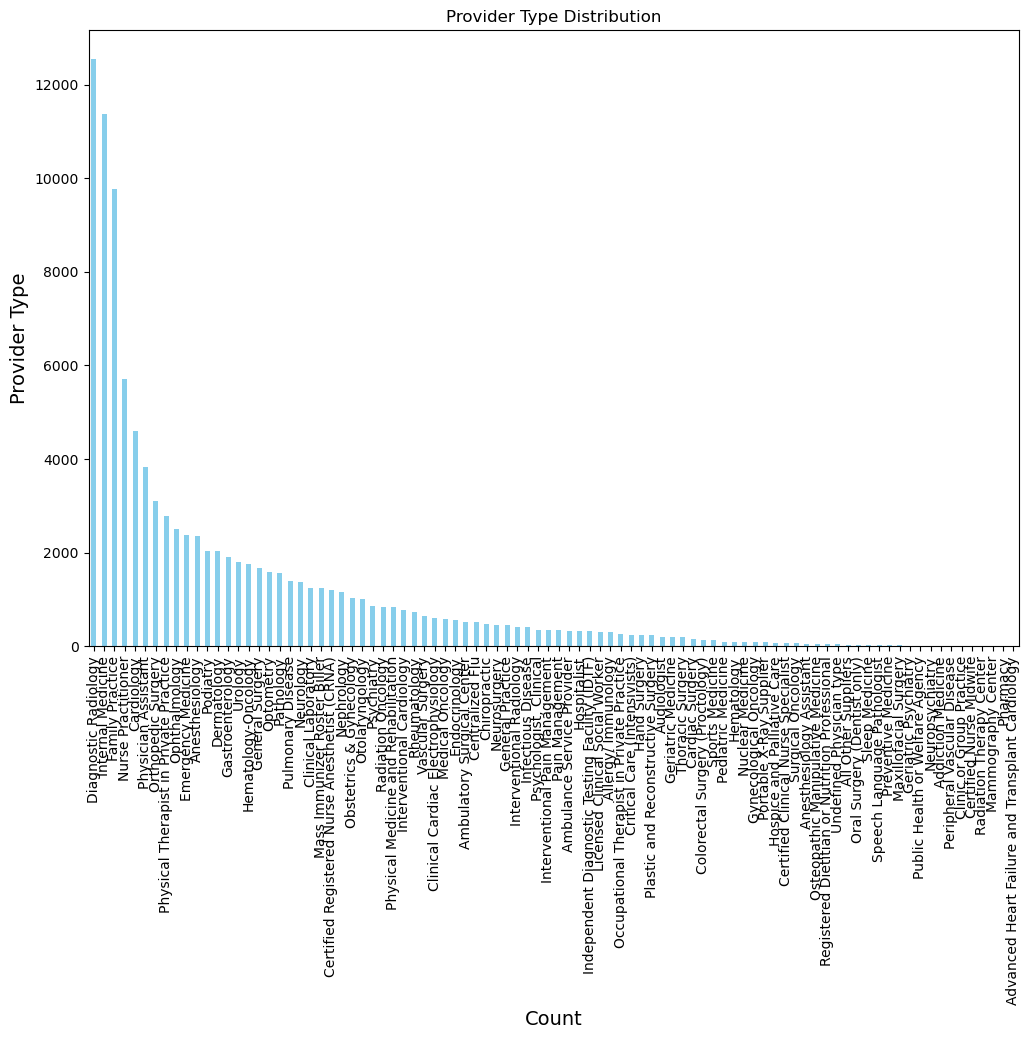

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

#visualization

# Bar chart:provider type distribution

plt.figure(figsize=(12, 8))  
provider_type_distribution.plot(kind='bar', color='skyblue')  
plt.title('Provider Type Distribution')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Provider Type', fontsize=14)
plt.xticks(rotation=90)
plt.show()

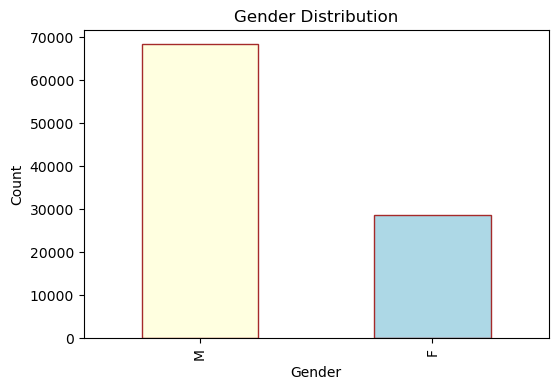

In [43]:
# Bar chart:gender distribution
plt.figure(figsize=(6, 4))
gender_distribution.plot(kind='bar', color=['lightyellow','lightblue'],edgecolor='brown')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

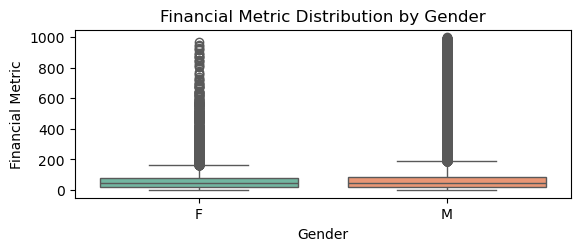

In [45]:
# Boxplot:financial metrics by gender
plt.subplot(2, 1, 2)
sns.boxplot(x='Gender of the Provider', y='Average Medicare Payment Amount', data=cleaned_df, palette='Set2')
plt.title('Financial Metric Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Financial Metric')
plt.show()


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as plx

In [49]:
2.
#State wise Distribution

# Group by state and count providers
state_provider_counts = cleaned_df.groupby('State Code of the Provider')['First Name of the Provider'].count().sort_values(ascending=False)

# State with highest and lowest provider count

print("\nStates with highest Provider count:")
print(state_provider_counts.head(5))
print("\nStates with lowest Provider count:")
print(state_provider_counts.tail(5))


States with highest Provider count:
State Code of the Provider
CA    7474
FL    6941
TX    6626
NY    6131
PA    4462
Name: First Name of the Provider, dtype: int64

States with lowest Provider count:
State Code of the Provider
GU    15
ZZ     6
AP     3
AE     2
AA     1
Name: First Name of the Provider, dtype: int64


In [51]:
#state-level financial performance based on average and total payments

state_metrics = cleaned_df.groupby('State Code of the Provider').agg({
    'Number of Services': 'sum',
    'Average Medicare Payment Amount': 'mean'
}).reset_index()

# Display top 5 states by service volume
print("\nTop 5 States by Service Volume:")
print(state_metrics.sort_values('Number of Services', ascending=False).head(5))

# Display top 5 states by financial performance
print("\nTop 5 States by Average Payment Amount:")
print(state_metrics.sort_values('Average Medicare Payment Amount', ascending=False).head(5))



Top 5 States by Service Volume:
   State Code of the Provider  Number of Services  \
7                          CA            808186.3   
12                         FL            756259.0   
48                         TX            688642.6   
38                         NY            661785.0   
18                         IL            414548.6   

    Average Medicare Payment Amount  
7                         79.420463  
12                        78.471692  
48                        69.904637  
38                        73.510401  
18                        69.122523  

Top 5 States by Average Payment Amount:
   State Code of the Provider  Number of Services  \
14                         GU              1162.0   
10                         DC             21909.0   
1                          AE                70.0   
11                         DE             41901.0   
7                          CA            808186.3   

    Average Medicare Payment Amount  
14                    

In [53]:
#CITY_WISE ANALYSIS

# cities with most active healthcare providers.
#group by city
city_provider_counts = cleaned_df.groupby('City of the Provider')['First Name of the Provider'].count().sort_values(ascending=False)

#top 5 cities with most active healthcare providers
print("\nCities with Most Active Providers:")
active_cities=city_provider_counts.head(5)
print(active_cities)


Cities with Most Active Providers:
City of the Provider
NEW YORK        1026
HOUSTON          846
CHICAGO          741
PHILADELPHIA     643
BOSTON           626
Name: First Name of the Provider, dtype: int64


In [55]:
# Aggregate financial metrics by city
city_service_costs = cleaned_df.groupby('City of the Provider')['Average Medicare Payment Amount'].mean().reset_index()

#top 5 cities with usually highest service costs
print("\nTop 5 Cities with Highest Service Costs:")
print(city_service_costs.sort_values('Average Medicare Payment Amount', ascending=False).head(5))

#top 5 cities with usually lowest service costs
print("\nTop 5 Cities with Lowest Service Costs:")
print(city_service_costs.sort_values('Average Medicare Payment Amount', ascending=True).head(5))



Top 5 Cities with Highest Service Costs:
     City of the Provider  Average Medicare Payment Amount
1325          E. WEYMOUTH                       931.385185
5316         W LAKE HILLS                       888.826557
7                    ACME                       845.118800
224           BAILEYVILLE                       666.400000
2400            IRWINDALE                       637.018942

Top 5 Cities with Lowest Service Costs:
     City of the Provider  Average Medicare Payment Amount
1748          FRANKENMUTH                         0.023529
5599             WILDWOOD                         0.040000
888            CITRONELLE                         0.061750
1214            DEMOPOLIS                         0.069060
152          ARIZONA CITY                         0.077699


In [57]:
state_metrics = cleaned_df.groupby('State Code of the Provider').agg({
    'First Name of the Provider': 'count',  # Count of providers
    'Average Medicare Payment Amount': 'mean'  # Average payment amount
}).reset_index()

state_metrics.rename(columns={
    'First Name of the Provider': 'Provider Count',
    'Average Medicare Payment Amount': 'Average Payment'
}, inplace=True)

print(state_metrics.head()) 

  State Code of the Provider  Provider Count  Average Payment
0                         AA               1        28.600000
1                         AE               2        86.634320
2                         AK             164        75.991893
3                         AL            1753        62.736115
4                         AP               3        53.072155


In [59]:
#visualization

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_metrics = scaler.fit_transform(state_metrics[['Provider Count', 'Average Payment']])
state_metrics_normalized = pd.DataFrame(normalized_metrics, columns=['Provider Count', 'Average Payment'], index=state_metrics['State Code of the Provider'])


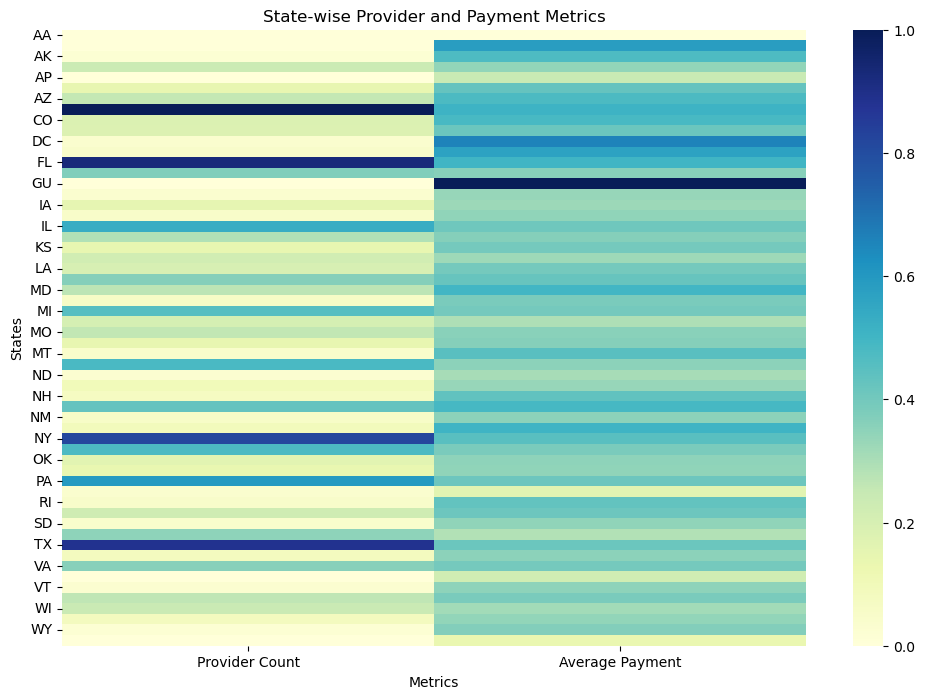

In [61]:
#heatmaps for state-wise provider and payment metrics

plt.figure(figsize=(12, 8))
sns.heatmap(state_metrics_normalized, fmt='.2f', cmap="YlGnBu", cbar=True)
plt.title('State-wise Provider and Payment Metrics')
plt.xlabel('Metrics')
plt.ylabel('States')
plt.show()

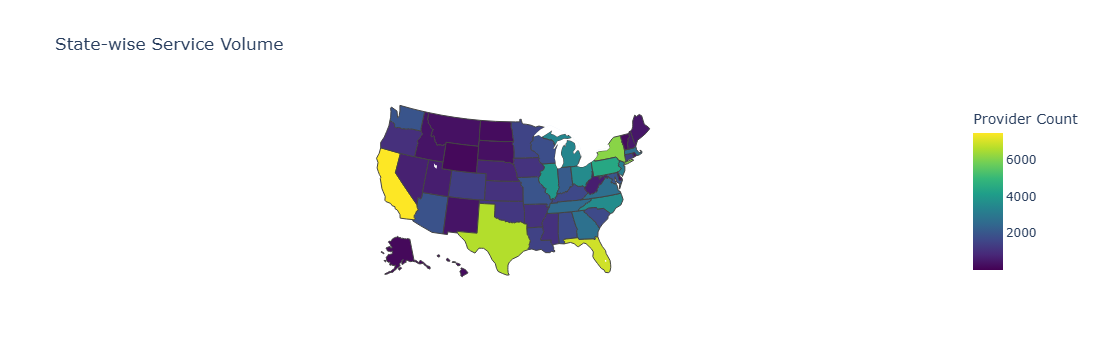

In [63]:
import plotly.express as px

# Map state codes to full names
state_code_to_name = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
}
state_metrics['State'] = state_metrics['State Code of the Provider'].map(state_code_to_name)

#choropleth map for geographic trends.

fig = px.choropleth(
    state_metrics,
    locations='State Code of the Provider',  # Use state codes for mapping
    locationmode='USA-states',  # USA-specific state codes
    color='Provider Count',  # Metric to visualize (adjust as needed)
    hover_name='State',  # State names for tooltips
    scope='usa',  # Focus on USA
    color_continuous_scale='Viridis',  # Color scale
    title='State-wise Service Volume'
)
fig.show()

In [65]:
#3.financial perofrmance

import seaborn as sns

In [67]:
# Ensure the columns are numeric (convert strings to numbers, setting errors='coerce' to handle non-numeric values)
cleaned_df['Average Submitted Charge Amount'] = pd.to_numeric(cleaned_df['Average Submitted Charge Amount'], errors='coerce')
cleaned_df['Average Medicare Payment Amount'] = pd.to_numeric(cleaned_df['Average Medicare Payment Amount'], errors='coerce')


# Charges vs Medicare Payment 
charge_payment_comparison = cleaned_df[['Average Submitted Charge Amount', 'Average Medicare Payment Amount']].copy()
charge_payment_comparison['Charge-to-Payment Ratio'] = (
    charge_payment_comparison['Average Submitted Charge Amount'] /
    charge_payment_comparison['Average Medicare Payment Amount']
)

# Calculate Charge-to-Payment Ratio, ignoring rows where division is not possible
cleaned_df['Charge-to-Payment Ratio'] = cleaned_df['Average Submitted Charge Amount'] / cleaned_df['Average Medicare Payment Amount']

# Drop rows : the ratio could not be computed (NaN values)
cleaned_df = cleaned_df.dropna(subset=['Charge-to-Payment Ratio'])

#providers with high charge-to-payment ratios
high_ratio_providers = cleaned_df[cleaned_df['Charge-to-Payment Ratio'] > 10][
    ['Last Name/Organization Name of the Provider', 'State Code of the Provider', 'Charge-to-Payment Ratio']
].sort_values(by='Charge-to-Payment Ratio', ascending=False)

# Display the results
print("\nTop Providers with High Charge-to-Payment Ratios:")
print(high_ratio_providers.head(10))


# Charge vs Payment Discrepancies
charge_payment_comparison = cleaned_df[['Average Submitted Charge Amount', 'Average Medicare Payment Amount']].copy()
charge_payment_comparison['Charge-to-Payment Ratio'] = charge_payment_comparison['Average Submitted Charge Amount'] / charge_payment_comparison['Average Medicare Payment Amount']

high_ratio_providers = charge_payment_comparison.sort_values(by='Charge-to-Payment Ratio', ascending=False).head(10)



Top Providers with High Charge-to-Payment Ratios:
      Last Name/Organization Name of the Provider State Code of the Provider  \
50498                                       ALLEN                         GA   
33572                                        WEIR                         SC   
88188                                        LOWE                         TN   
79093                                      ARENDT                         SC   
76723                                        ZHOU                         KY   
74281                                          WU                         IN   
63346                                   TASHTOUSH                         FL   
60862                              MATOS-GARSAULT                         GA   
91305                                       CHAVA                         CA   
90741                                       UNICK                         KY   

       Charge-to-Payment Ratio  
50498              2676.153842  
33

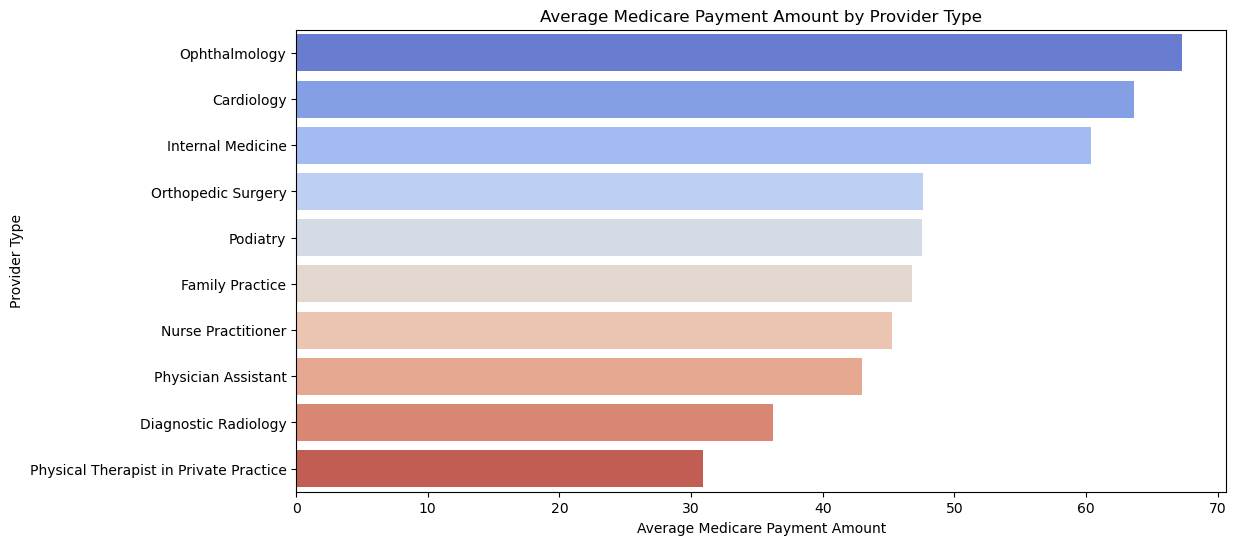

In [69]:
top_provider_types = cleaned_df['Provider Type'].value_counts().head(10).index
filtered_df = cleaned_df[cleaned_df['Provider Type'].isin(top_provider_types)]
# Bar plot for mean cost by provider type
provider_type_cost = (
    filtered_df.groupby('Provider Type')['Average Medicare Payment Amount']
    .mean()
    .sort_values(ascending=False)
    .head(10) 
)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=provider_type_cost.values,
    y=provider_type_cost.index,
    palette="coolwarm"
)
plt.title("Average Medicare Payment Amount by Provider Type")
plt.xlabel("Average Medicare Payment Amount")
plt.ylabel("Provider Type")
plt.show()



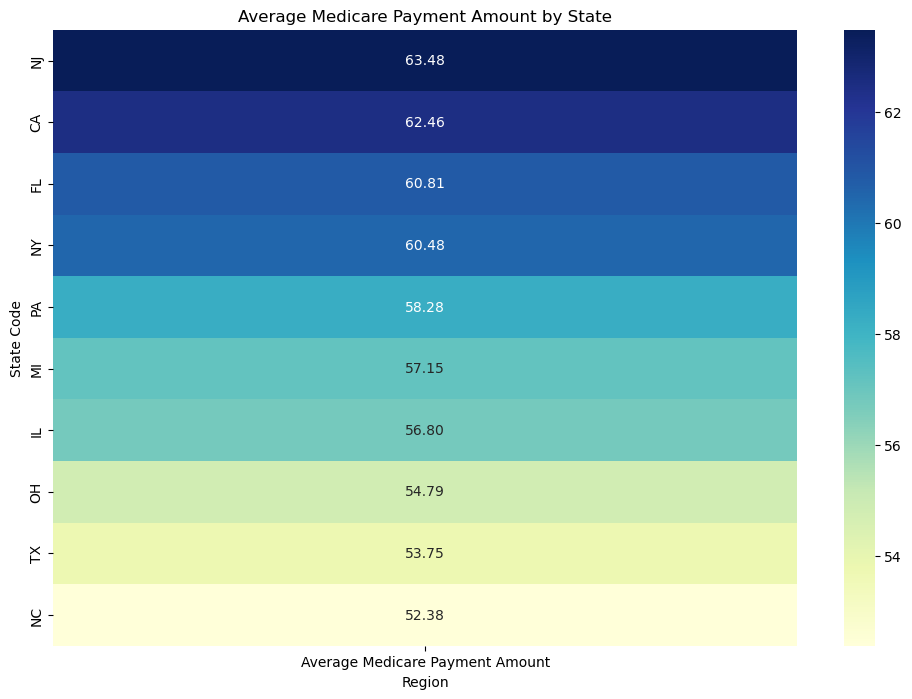

In [71]:
top_states = cleaned_df['State Code of the Provider'].value_counts().head(10).index
filtered_states_df = cleaned_df[cleaned_df['State Code of the Provider'].isin(top_states)]
# Pivot table for heatmap
state_cost = filtered_states_df.pivot_table(
    values='Average Medicare Payment Amount',
    index='State Code of the Provider',
    aggfunc='mean'
).sort_values(by='Average Medicare Payment Amount', ascending=False)

# Heatmap for state-wise average cost
plt.figure(figsize=(12, 8))
sns.heatmap(
    state_cost,
    annot=True,
    fmt=".2f",
    cmap="YlGnBu",
    cbar=True
)
plt.title("Average Medicare Payment Amount by State")
plt.xlabel("Region")
plt.ylabel("State Code")
plt.show()


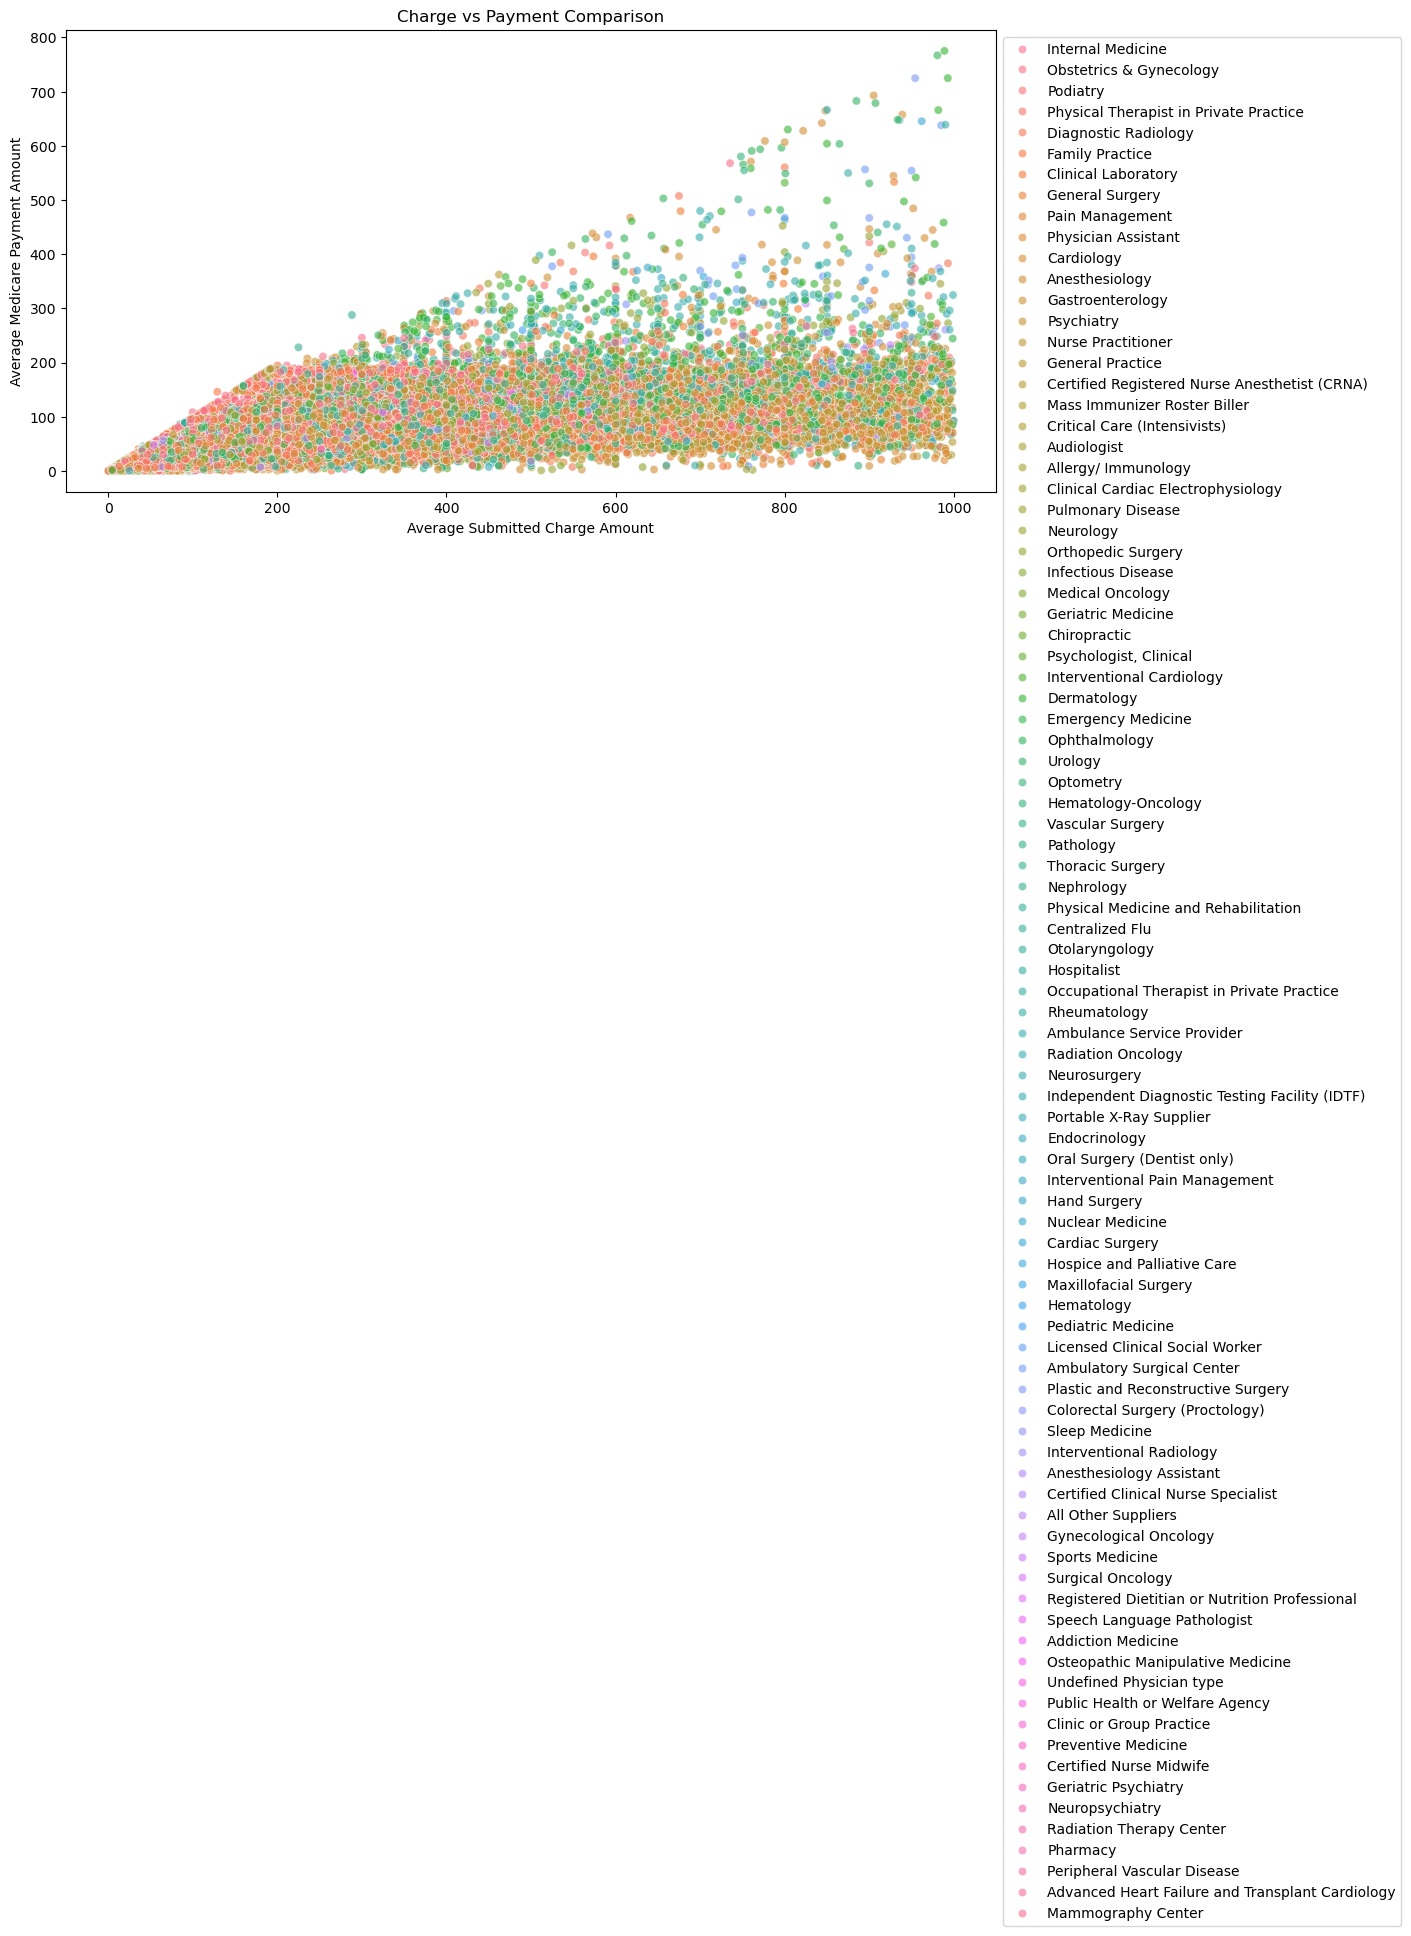

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot :Charge Amount vs Average Medicare Payment comparison
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=cleaned_df,
    x='Average Submitted Charge Amount',
    y='Average Medicare Payment Amount',
    hue='Provider Type',
    alpha=0.6
)
plt.title("Charge vs Payment Comparison")
plt.xlabel("Average Submitted Charge Amount")
plt.ylabel("Average Medicare Payment Amount")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()


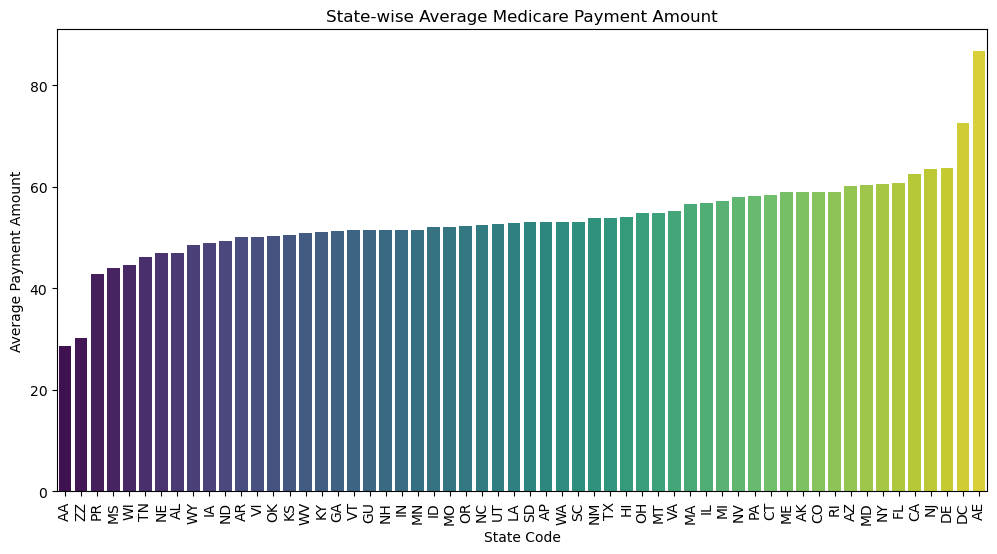

In [75]:
statewise_cost = cleaned_df.groupby('State Code of the Provider')['Average Medicare Payment Amount'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(
    x=statewise_cost.index,
    y=statewise_cost.values,
    palette="viridis"
)
plt.title("State-wise Average Medicare Payment Amount")
plt.xlabel("State Code")
plt.ylabel("Average Payment Amount")
plt.xticks(rotation=90)
plt.show()

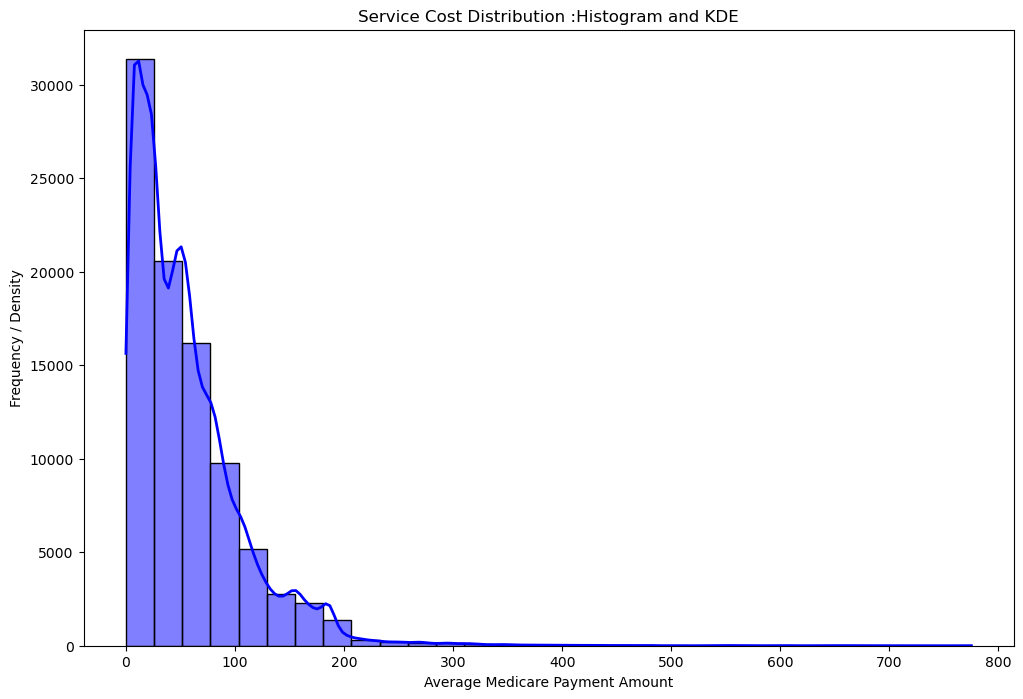

In [77]:
# Histogram and KDE plot for service cost distribution
plt.figure(figsize=(12, 8))
sns.histplot(
    cleaned_df['Average Medicare Payment Amount'],
    kde=True,  # Add KDE to the histogram
    bins=30,   # Number of bins
    color='blue',
    line_kws={'linewidth': 2}  # Style for the KDE line
)
plt.title("Service Cost Distribution :Histogram and KDE")
plt.xlabel("Average Medicare Payment Amount")
plt.ylabel("Frequency / Density")
plt.show()

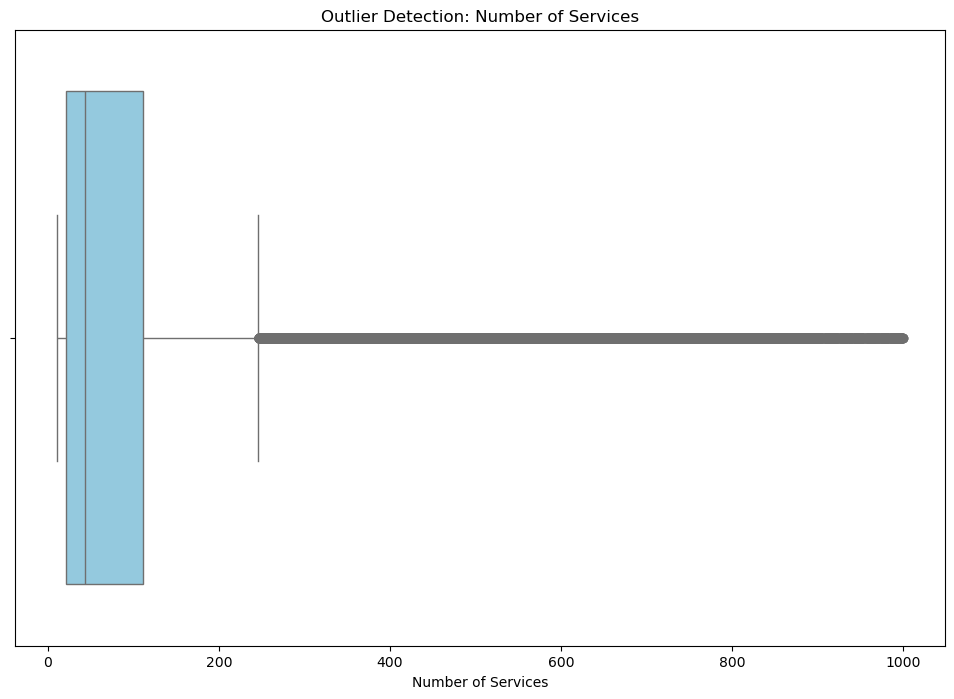

In [79]:
#4.anomaly detection

# Boxplot for detecting outliers in service 
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=cleaned_df,
    x='Number of Services',
    color='skyblue'
)
plt.title("Outlier Detection: Number of Services")
plt.xlabel("Number of Services")
plt.show()

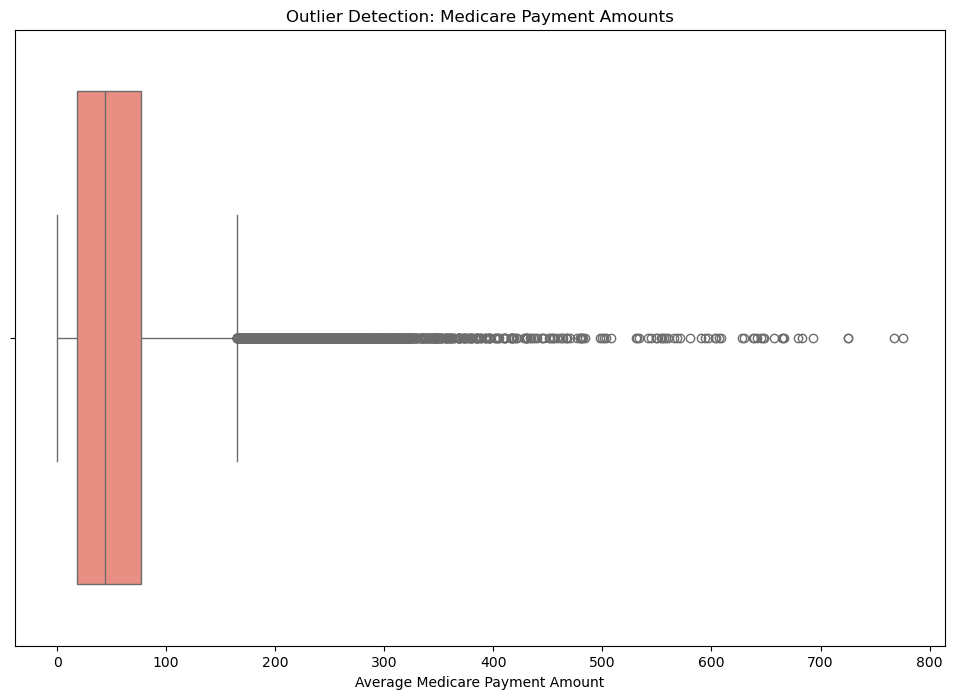

In [81]:
# Boxplot for detecting outliers in payment 
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=cleaned_df,
    x='Average Medicare Payment Amount',
    color='salmon'
)
plt.title("Outlier Detection: Medicare Payment Amounts")
plt.xlabel("Average Medicare Payment Amount")
plt.show()

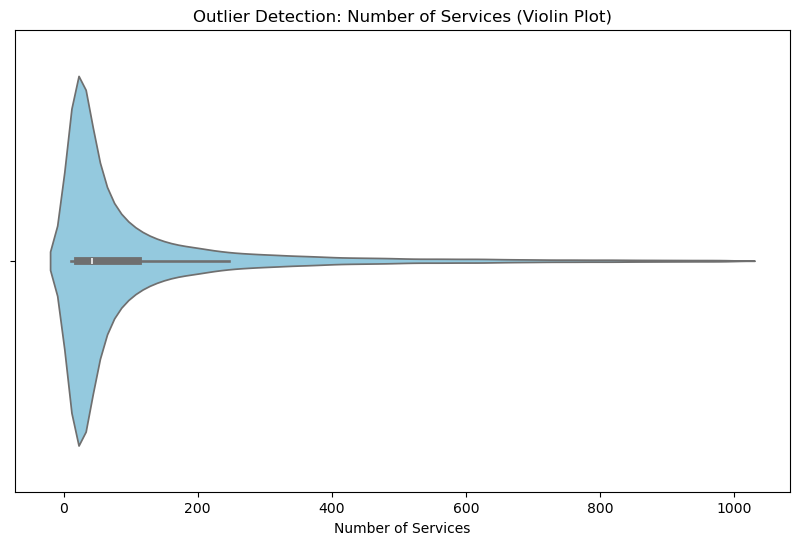

In [83]:
# Violin plot for detecting outliers in service volumes
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=cleaned_df,
    x='Number of Services',
    color='skyblue'
)
plt.title("Outlier Detection: Number of Services (Violin Plot)")
plt.xlabel("Number of Services")
plt.show()

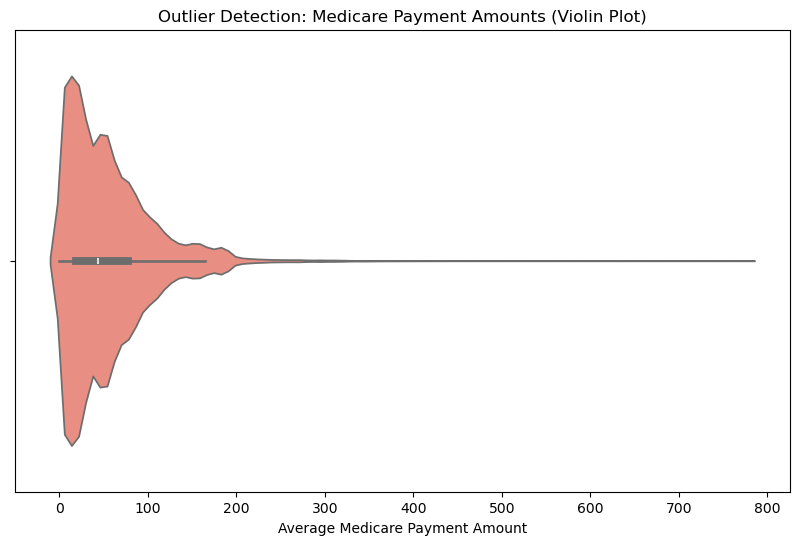

In [85]:
# Violin plot for detecting outliers in payment amounts
plt.figure(figsize=(10, 6))
sns.violinplot(
    data=cleaned_df,
    x='Average Medicare Payment Amount',
    color='salmon'
)
plt.title("Outlier Detection: Medicare Payment Amounts (Violin Plot)")
plt.xlabel("Average Medicare Payment Amount")
plt.show()

In [89]:
# Identify HCPCS codes associated with extreme values
hcpcs_analysis = cleaned_df.groupby('HCPCS Code')[['Average Medicare Payment Amount', 'Number of Services']].agg(['mean', 'sum']).reset_index()
hcpcs_analysis.columns = ['HCPCS Code', 'Avg Payment Mean', 'Total Payment Sum', 'Service Mean', 'Service Sum']
top_hcpcs_codes = hcpcs_analysis.sort_values(by='Total Payment Sum', ascending=False).head(10)


In [91]:
# Detect providers with unusually high payment amounts
q1_payments = cleaned_df['Average Medicare Payment Amount'].quantile(0.25)
q3_payments = cleaned_df['Average Medicare Payment Amount'].quantile(0.75)
iqr_payments = q3_payments - q1_payments

outlier_payments = cleaned_df[
    (cleaned_df['Average Medicare Payment Amount'] < (q1_payments - 1.5 * iqr_payments)) |
    (cleaned_df['Average Medicare Payment Amount'] > (q3_payments + 1.5 * iqr_payments))
]

print("Outlier Providers (Payment Amounts):")
print(outlier_payments[['Last Name/Organization Name of the Provider', 'Average Medicare Payment Amount', 'State Code of the Provider']])


Outlier Providers (Payment Amounts):
      Last Name/Organization Name of the Provider  \
13                                         SARANI   
26                                       AVALLONE   
73                                       MATTEACE   
103                                       BHAVSAR   
195                                         SAHNI   
...                                           ...   
99954                                     STOCKER   
99955                                      DAILEY   
99968                                    SIDDIQUI   
99976                                        BARB   
99989                                     KESAVAN   

       Average Medicare Payment Amount State Code of the Provider  
13                          192.630377                         DC  
26                          183.587917                         FL  
73                          173.960909                         NJ  
103                         166.448069                

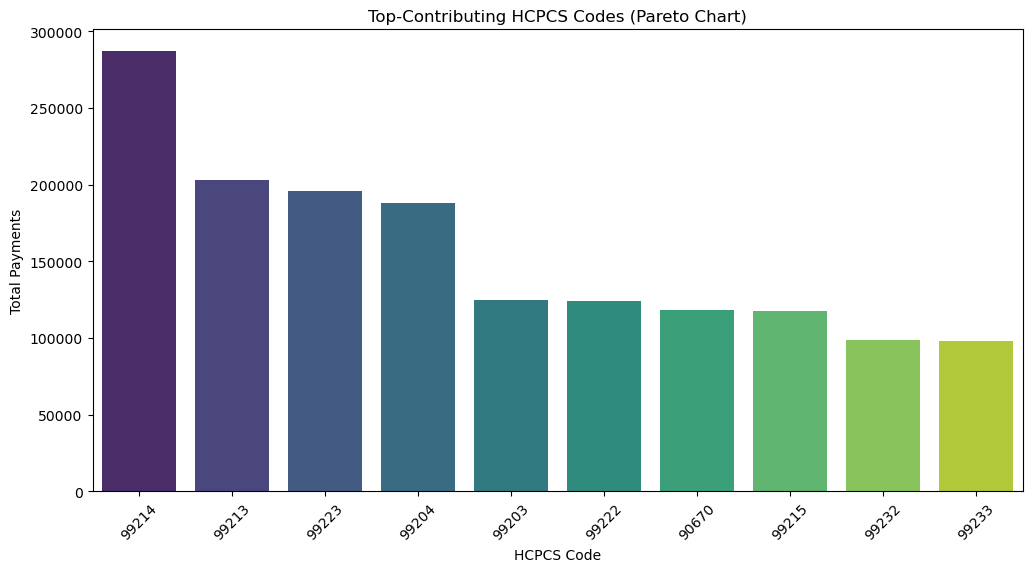

Top-Contributing HCPCS Codes:
     HCPCS Code  Avg Payment Mean  Total Payment Sum  Service Mean  \
1891      99214         67.527096      286787.576699    195.411467   
1890      99213         45.401432      202808.197438    175.974927   
1899      99223        156.098575      195747.612737     75.681818   
1886      99204        108.410828      188092.787215     50.843228   
1885      99203         67.659360      124628.540421     59.705755   
1898      99222        103.995463      124378.573270     53.842809   
1484      90670        183.838797      118576.024284     29.888372   
1892      99215         96.270032      117545.708474     71.630631   
1904      99232         55.768930       98599.467627    191.842760   
1905      99233         81.191008       97997.546732    153.328086   

      Service Sum  
1891     829912.5  
1890     786080.0  
1899      94905.0  
1886      88213.0  
1885     109978.0  
1898      64396.0  
1484      19278.0  
1892      87461.0  
1904     339178.0  

In [93]:
# Pareto Chart for Top HCPCS Codes
plt.figure(figsize=(12, 6))
sns.barplot(x='HCPCS Code', y='Total Payment Sum', data=top_hcpcs_codes, palette='viridis')
plt.title("Top-Contributing HCPCS Codes (Pareto Chart)")
plt.xlabel("HCPCS Code")
plt.ylabel("Total Payments")
plt.xticks(rotation=45)
plt.show()

print("Top-Contributing HCPCS Codes:")
print(top_hcpcs_codes)


5.Service Metrics

In [96]:
#service volume trends
# Group by 'State Code of the Provider' and 'Provider Type'
service_volume =cleaned_df.groupby(['State Code of the Provider', 'Provider Type'])['Number of Services'].sum().unstack().fillna(0)


<Figure size 1200x600 with 0 Axes>

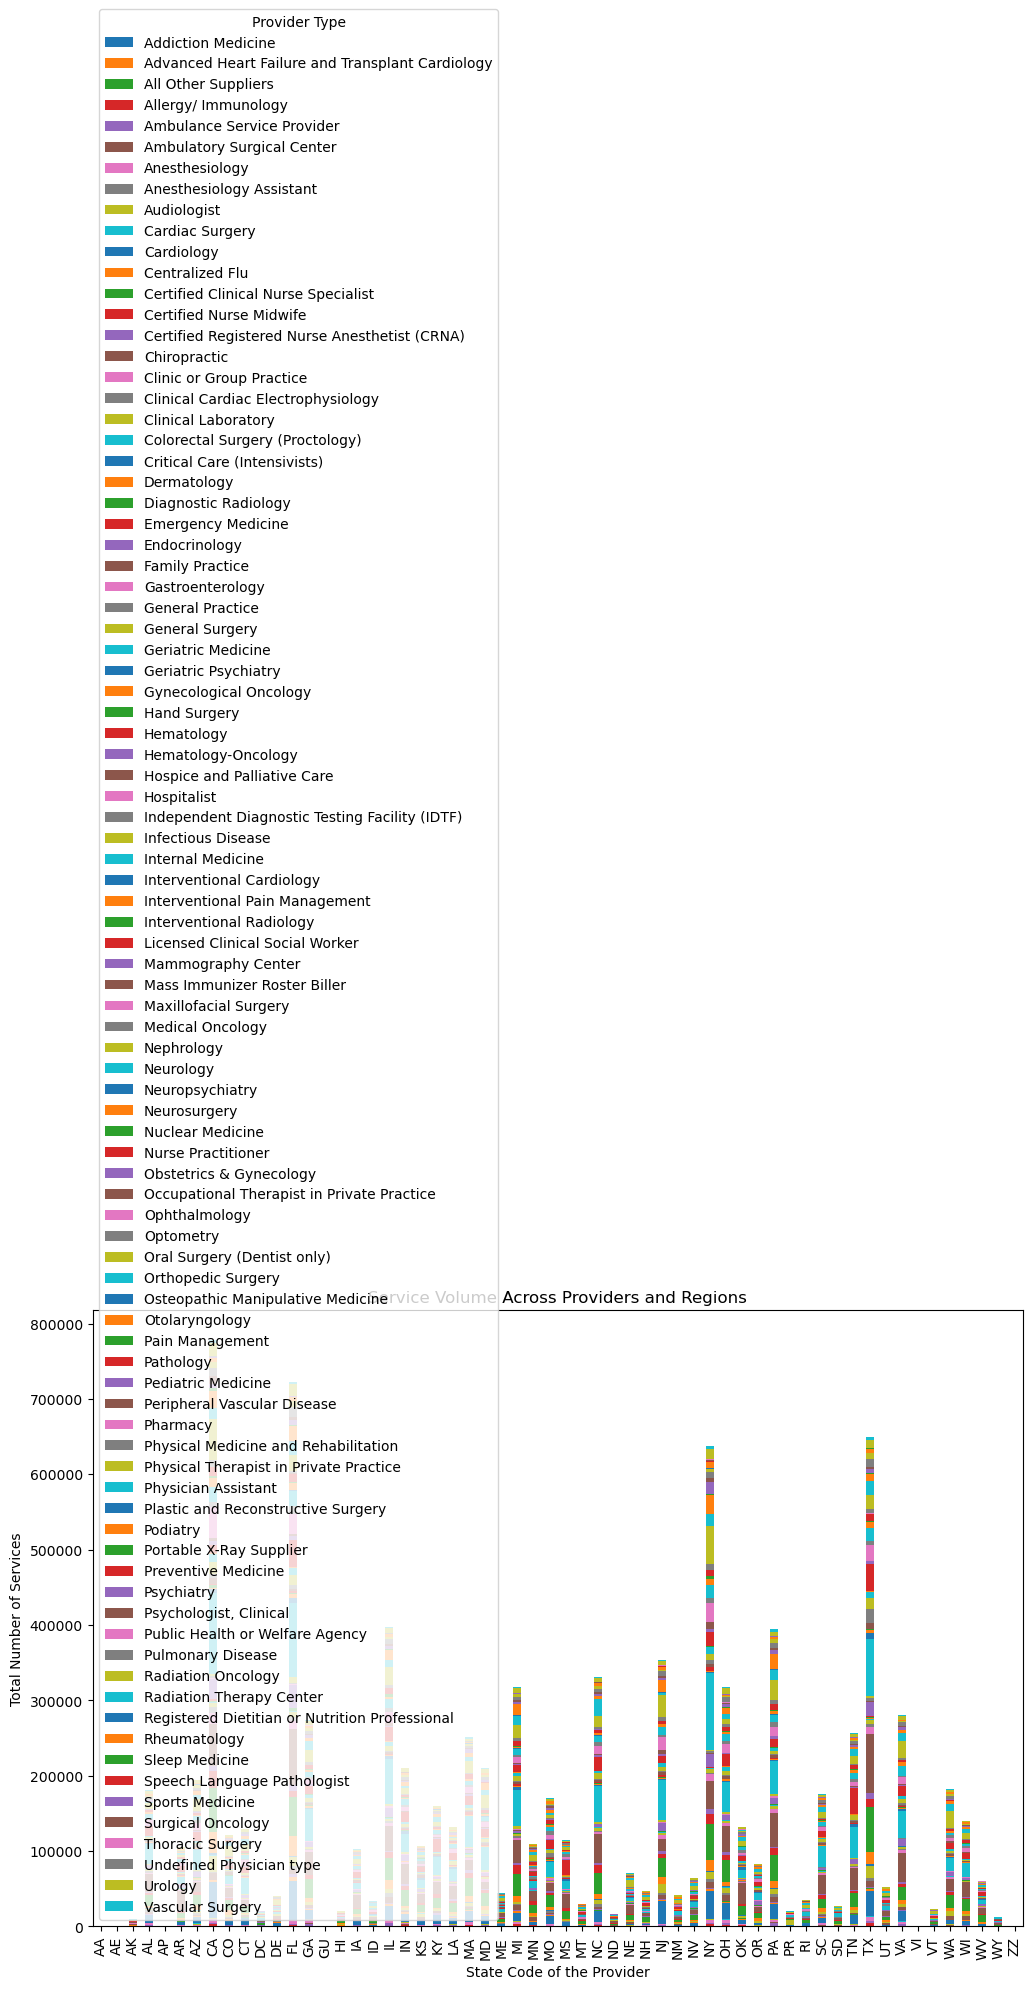

In [100]:

# Plot Service Volume Trends (Stacked Bar Plot)
plt.figure(figsize=(12, 6))
service_volume.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Service Volume Across Providers and Regions')
plt.ylabel('Total Number of Services')
plt.xlabel('State Code of the Provider')
plt.xticks(rotation=90)
plt.show()

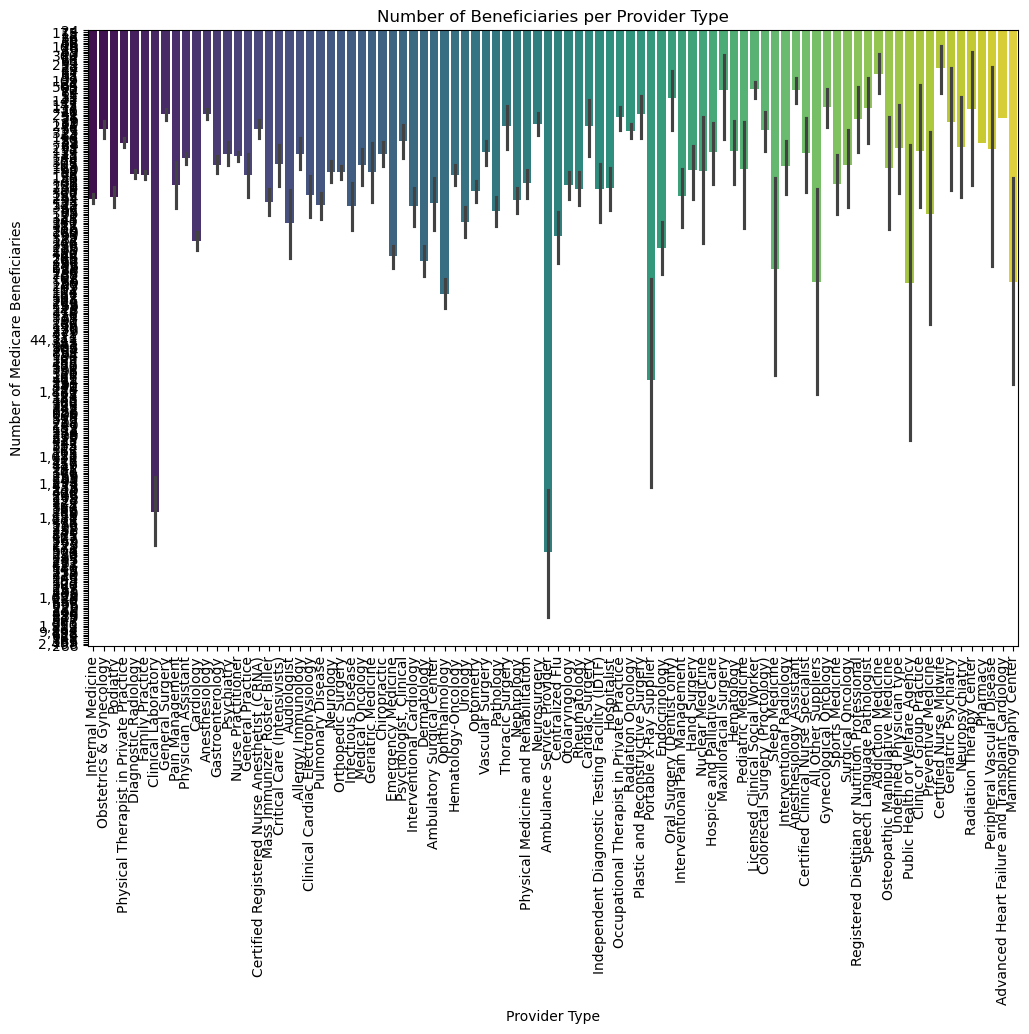

In [101]:
#beneficiary analysis
# number of beneficiaries per provider 
plt.figure(figsize=(12, 8))
sns.barplot(x='Provider Type', y='Number of Medicare Beneficiaries', data=df, palette='viridis')
plt.title('Number of Beneficiaries per Provider Type')
plt.ylabel('Number of Medicare Beneficiaries')
plt.xlabel('Provider Type')
plt.xticks(rotation=90)
plt.show()


In [108]:
print(len(cleaned_df['Number of Services']))
print(len(cleaned_df['Average Medicare Payment Amount']))
print(len(cleaned_df['Number of Medicare Beneficiaries']))

90664
90664
90664


In [110]:
# Convert the column to numeric:
cleaned_df['Number of Medicare Beneficiaries'] = pd.to_numeric(cleaned_df['Number of Medicare Beneficiaries'], errors='coerce')
#After conversion, if there are any NaN values, you can fill them with 0 or another appropriate value.
cleaned_df['Number of Medicare Beneficiaries'] = cleaned_df['Number of Medicare Beneficiaries'].fillna(0)


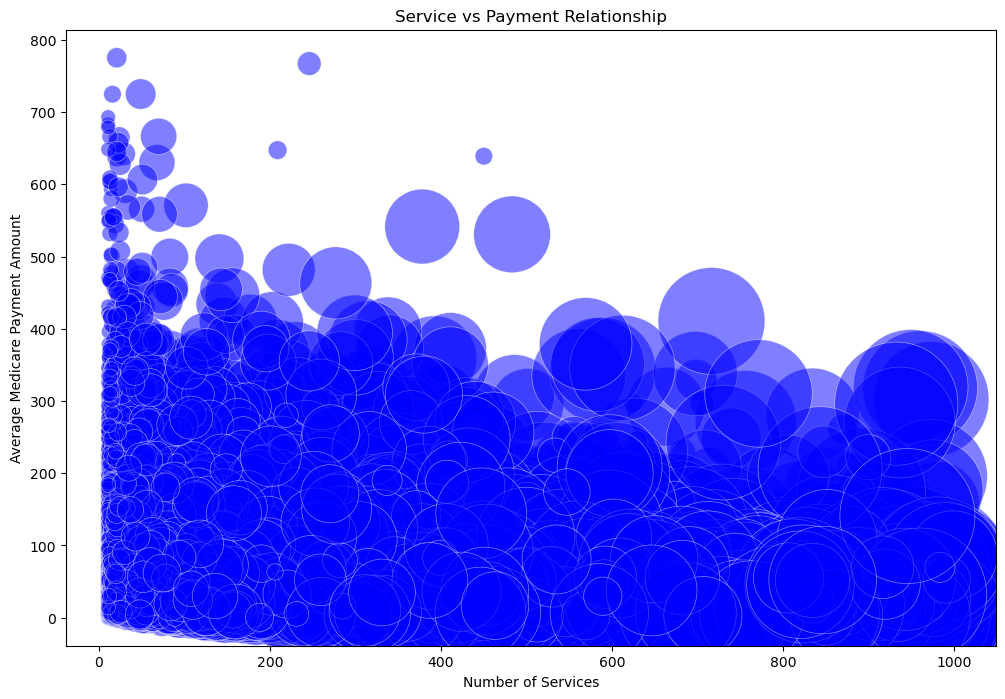

In [112]:
#bubble chart for service vs payment relationship

plt.figure(figsize=(12, 8))
plt.scatter(cleaned_df['Number of Services'], cleaned_df['Average Medicare Payment Amount'], s=cleaned_df['Number of Medicare Beneficiaries']*10, alpha=0.5, c='blue', edgecolors='w', linewidth=0.5)
plt.title('Service vs Payment Relationship')
plt.xlabel('Number of Services')
plt.ylabel('Average Medicare Payment Amount')
plt.show()

Data Quality and Patterns


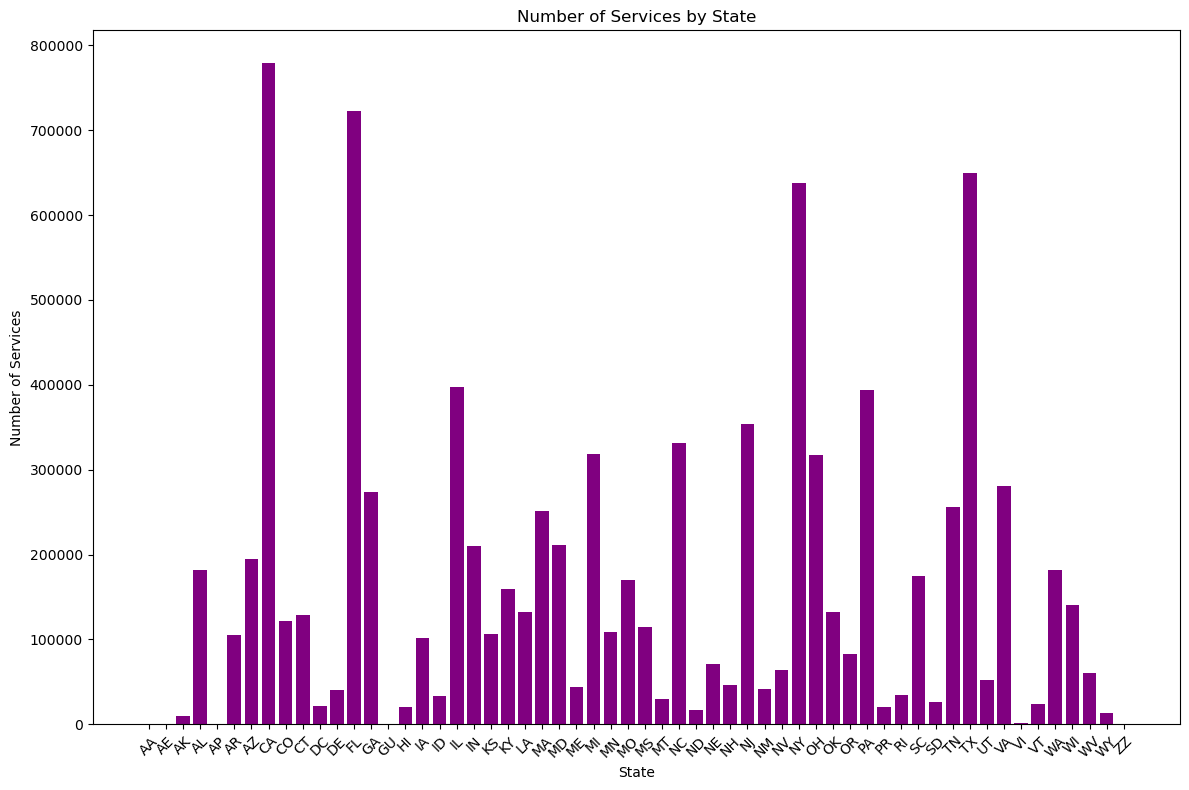

In [122]:

# Group by 'State Code of the Provider' and sum the services
state_data = cleaned_df.groupby('State Code of the Provider')['Number of Services'].sum().reset_index()

# Plot the number of services by state
plt.figure(figsize=(12, 8))
plt.bar(state_data['State Code of the Provider'], state_data['Number of Services'], color='purple')
plt.title('Number of Services by State')
plt.xlabel('State')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


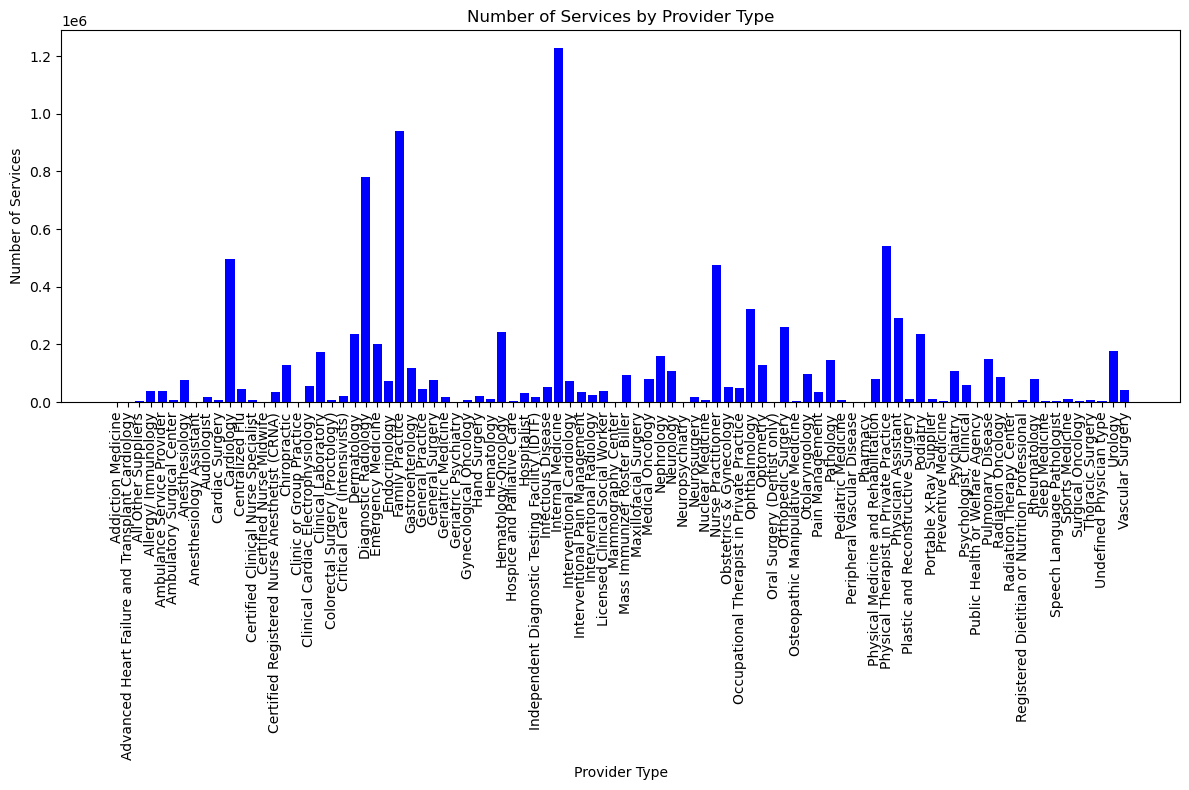

In [ ]:
provider_type_data = cleaned_df.groupby('Provider Type')['Number of Services'].sum().reset_index()

# Plot the number of services by provider type
plt.figure(figsize=(12, 8))
plt.bar(provider_type_data['Provider Type'], provider_type_data['Number of Services'], color='blue')
plt.title('Number of Services by Provider Type')
plt.xlabel('Provider Type')
plt.ylabel('Number of Services')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

6.data quality and patterns


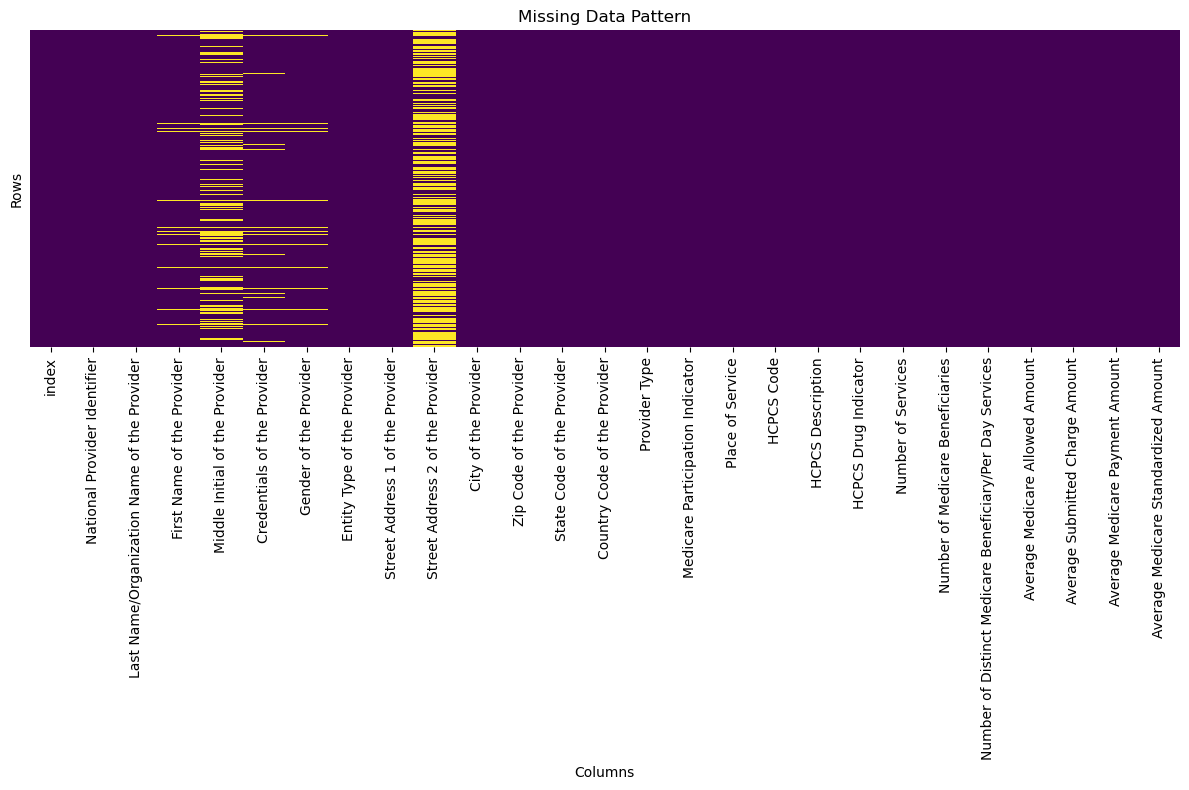

In [129]:
#1. Missing Data Patterns:
# Create a heatmap to visualize missing data
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Pattern')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.tight_layout()
plt.show()

In [133]:
address_columns = ['Street Address 1 of the Provider',  'City of the Provider', 'State Code of the Provider', 'Zip Code of the Provider']
address_duplicates = cleaned_df[address_columns].duplicated().sum()
print(f"Number of duplicate address entries: {address_duplicates}")

# Check for duplicate credentials
credential_duplicates = cleaned_df['Credentials of the Provider'].duplicated().sum()
print(f"Number of duplicate credentials entries: {credential_duplicates}")

Number of duplicate address entries: 38148
Number of duplicate credentials entries: 88898


Top 10 Providers by Service Count:
National Provider Identifier
1609812445    2872.0
1871554329    2121.0
1699734640    2038.0
1134277494    2016.0
1538144910    1983.0
1174562151    1798.0
1770867210    1780.0
1669476032    1761.0
1336303247    1723.0
1134379522    1707.0
Name: Number of Services, dtype: float64


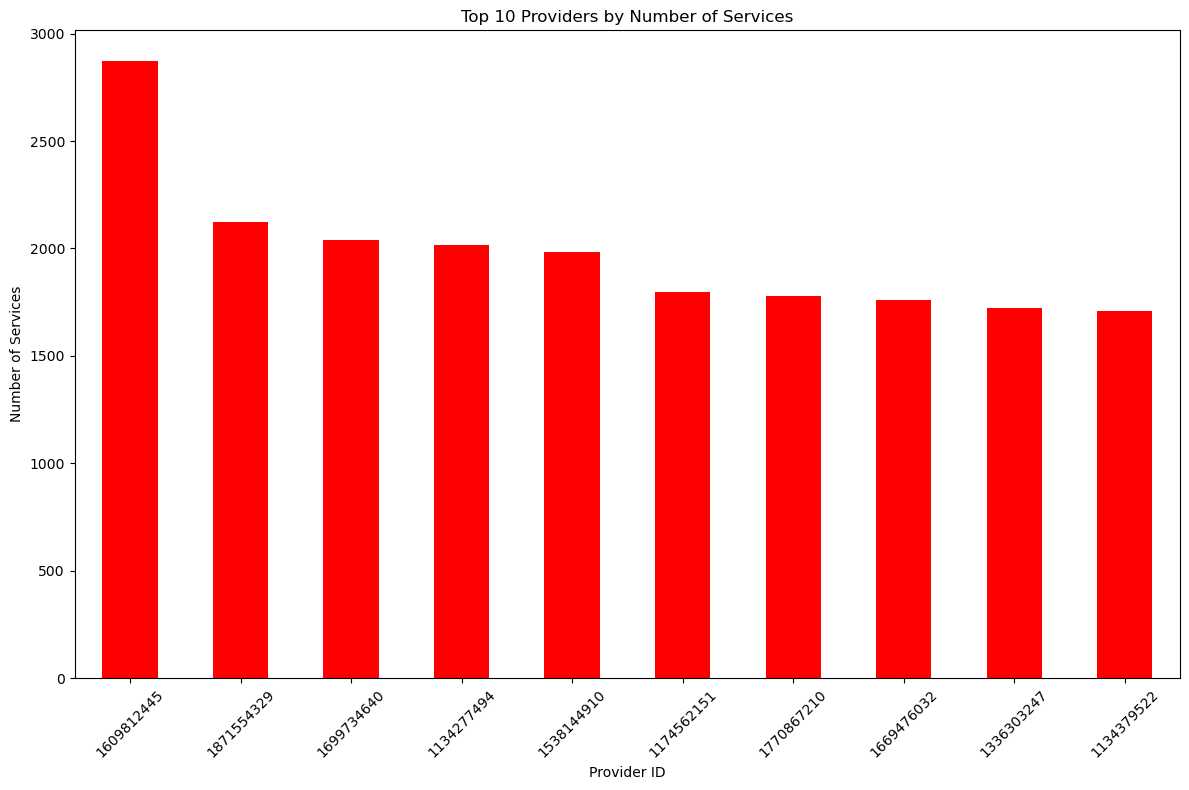

In [139]:
top_providers = cleaned_df.groupby('National Provider Identifier')['Number of Services'].sum().sort_values(ascending=False).head(10)
print("Top 10 Providers by Service Count:")
print(top_providers)

# Visualize the top 10 providers
plt.figure(figsize=(12, 8))
top_providers.plot(kind='bar', color='red')
plt.title('Top 10 Providers by Number of Services')
plt.xlabel('Provider ID')
plt.ylabel('Number of Services')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [143]:
inefficient_providers = cleaned_df[cleaned_df['Number of Services'] < 10]
print(f"Providers with low service count (below 10): {inefficient_providers[['National Provider Identifier', 'Number of Services']]}")


Providers with low service count (below 10): Empty DataFrame
Columns: [National Provider Identifier, Number of Services]
Index: []


In [145]:
inefficient_states = cleaned_df.groupby('State Code of the Provider')['Number of Services'].sum()
inefficient_states = inefficient_states[inefficient_states < 100]  # Customize threshold
print(f"States with low service count: {inefficient_states}")


States with low service count: State Code of the Provider
AE    70.0
Name: Number of Services, dtype: float64
